# Telecom churn case study

## Problem statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

**To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.**

1. We need to identify customers who are likely to churn in future, given the previous months data to predict
2. We need to define this churn only in high value customers
3. In the given data there are three phases in the data, the good phase, action phase and churn phase
4. we have to make use of the good an daction phase to predict the churn

Steps of Approach
1. Reading data
2. Missing Value data
3. High value customers
4. Tagging churn vs non-churn
5. EDA
6. Model building
7. Business Recomendations

## Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

churn = pd.read_csv("telecom_churn_data.csv")

In [3]:
churn.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.258,...,0,NaN,NaN,NaN,NaN,1471,0.00,0.00,0.00,0.00
6,7001051193,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,429.023,...,0,NaN,NaN,NaN,NaN,1673,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.00
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.00
9,7001864400,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,119.518,...,0,NaN,1.0,NaN,NaN,902,0.00,0.00,0.00,0.00


In [4]:
#To increase the display width of the data (i.e. #columns,rows)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
churn.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
churn.describe(include=[np.number])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [8]:
churn.describe(include=[np.object])

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
count,99999,99398,98899,98340,98392,98232,96377,95239,25153,25571,26339,25922
unique,1,1,1,1,30,31,31,30,30,31,31,30
top,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014,6/30/2014,7/31/2014,8/31/2014,9/29/2014
freq,99999,99398,98899,98340,16960,17288,14706,22623,1888,1813,1998,2329


In [9]:
#Seperating the date, ID and numerical columns
churn_date=['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9']
churn_id = ["mobile_number","circle_id" ]
churn_num = [col for col in churn.columns if col not in churn_date + churn_id]

In [10]:
churn_num

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [11]:
# when you look at the CSV file you will realise that the FB and night pack users are actually categorical columns
#coded 0 and 1 for yes and no, so lets seperate them as well
churn_cat = ['fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9','night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9']
#new num columns will be as following
churn_num = [col for col in churn_num if col not in churn_cat]

In [12]:
churn_num

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [13]:
round(churn.isnull().sum()/len(churn.index),4)*100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

## Missing value treatement

In [14]:
# categorical columns
churn[churn_cat] = churn[churn_cat].apply(lambda x: x.fillna(-1))

In [15]:
round(churn.isnull().sum()/len(churn.index),4)*100

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [16]:
churn.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [17]:
#we can impute the recharge columns such as total, avg and max with 0 as null valiue idicates no recharge
i = ["total_rech_data_6"
,"total_rech_data_7"
,"total_rech_data_8"
,"total_rech_data_9"
,"av_rech_amt_data_6"
,"av_rech_amt_data_7"
,"av_rech_amt_data_8"
,"av_rech_amt_data_9"
,"max_rech_data_6"
,"max_rech_data_7"
,"max_rech_data_8"
,"max_rech_data_9"]
churn[i]=churn[i].apply(lambda x: x.fillna(0))

In [18]:
churn[i].isna

<bound method DataFrame.isna of        total_rech_data_6  total_rech_data_7  total_rech_data_8  total_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  av_rech_amt_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  max_rech_data_9
0                    1.0                1.0                1.0                0.0               252.0               252.0               252.0                 0.0            252.0            252.0            252.0              0.0
1                    0.0                1.0                2.0                0.0                 0.0               154.0                50.0                 0.0              0.0            154.0             25.0              0.0
2                    0.0                0.0                0.0                1.0                 0.0                 0.0                 0.0                46.0              0.0              0.0              0.0             46.0
3                    0.0                0.0     

In [19]:
round(churn.isnull().sum()/len(churn.index),4)*100 > 70

mobile_number               False
circle_id                   False
loc_og_t2o_mou              False
std_og_t2o_mou              False
loc_ic_t2o_mou              False
last_date_of_month_6        False
last_date_of_month_7        False
last_date_of_month_8        False
last_date_of_month_9        False
arpu_6                      False
arpu_7                      False
arpu_8                      False
arpu_9                      False
onnet_mou_6                 False
onnet_mou_7                 False
onnet_mou_8                 False
onnet_mou_9                 False
offnet_mou_6                False
offnet_mou_7                False
offnet_mou_8                False
offnet_mou_9                False
roam_ic_mou_6               False
roam_ic_mou_7               False
roam_ic_mou_8               False
roam_ic_mou_9               False
roam_og_mou_6               False
roam_og_mou_7               False
roam_og_mou_8               False
roam_og_mou_9               False
loc_og_t2t_mou

In [20]:
j=["date_of_last_rech_data_6",'date_of_last_rech_data_7',
      'date_of_last_rech_data_8','date_of_last_rech_data_9']
churn[j]=churn[j].apply(lambda x: x.fillna(0))

There are many columns with more than 70% null values
These columns don't add any value to the data analysis, so lets remove them

In [21]:
#now lets remove these columns
removecolumn = churn.columns[100*(churn.isnull().sum()/len(churn.index)) > 70]
print(removecolumn)

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9'], dtype='object')


In [22]:
churn=churn.drop(removecolumn,axis=1)
churn.shape

(99999, 210)

In [23]:
#lets drop id columns as well
churn=churn.drop(churn_id,axis=1)
churn.shape

(99999, 208)

In [24]:
#identifying columns with missing values >0
x=churn.columns[100*(churn.isnull().sum()/len(churn.index)) > 0]
x

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9',
       ...
       'isd_ic_mou_8', 'isd_ic_mou_9', 'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], dtype='object', length=126)

In [25]:
#imputing with 0
churn[x]=churn[x].apply(lambda x: x.fillna(0))

In [26]:
round(churn.isnull().sum()/len(churn.index),4)*100 

loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
last_date_of_month_9        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
arpu_9                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
onnet_mou_9                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
offnet_mou_9                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_ic_mou_9               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
roam_og_mou_9               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2t_mou_9            0.0
loc_og_t

In [27]:
churn.nunique()

loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            2
last_date_of_month_8            2
last_date_of_month_9            2
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou_6            13539
loc_og_t2t_mou_7            13411
loc_og_t2t_mou

In [28]:
#dropping columns with only one unique value as they don'y add value
churn = churn.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],axis=1)
churn.shape

(99999, 205)

## Identifying High value customers

we can filter high value customers based on the amount of recharge they have done in the good months (6&7)<br>
total recharge amount = data recharge + normal recharge amount<br>
data recharge = total_rech_data*av_rech_amt_data

In [29]:
#data recharge
churn['total_data_rech_6'] = churn['total_rech_data_6'] * churn['av_rech_amt_data_6']
churn['total_data_rech_7'] = churn['total_rech_data_7'] * churn['av_rech_amt_data_7']

In [30]:
#total recharge
churn['amt_data_6'] = churn[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
churn['amt_data_7'] = churn[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

In [31]:
#average of both months to filter the customers
churn['AVG_amt_data_6_7'] = churn[['amt_data_6','amt_data_7']].mean(axis=1)
churn[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile(np.linspace(.1, 1, 9, 0))

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.1,0.0,0.0,60.0
0.2,80.0,65.0,108.5
0.3,120.0,110.0,155.0
0.4,170.0,160.0,209.5
0.5,230.0,220.0,275.0
0.6,290.0,283.0,360.0
0.7,378.0,370.0,478.0
0.8,504.0,500.0,656.5
0.9,732.0,731.0,1028.0


In [32]:
churn_highvalue = churn.loc[churn.AVG_amt_data_6_7 >= churn.AVG_amt_data_6_7.quantile(0.7), :]
churn_highvalue = churn_highvalue.reset_index(drop=True)
churn_highvalue.shape

(30001, 210)

## Tagging churn vs non-churn

customers whose outgoing and incoming calls minutes = 0 <br>
and useage of data 2g and 3g is 0, those customers are tagged as churned or 1

In [33]:
#tagging churn vs non churn
churn_highvalue['churn_tag'] = np.where(
                            ((churn_highvalue['total_ic_mou_9'] + churn_highvalue['total_og_mou_9'] == 0.00))
                            & ((churn_highvalue['vol_2g_mb_9'] + churn_highvalue['vol_3g_mb_9'] == 0.00))
                            , 1, 0)

In [34]:
# change data type to category
churn_highvalue.churn_tag = churn_highvalue.churn_tag.astype("category")

# print churn ratio
print("Churn Ratio:")
print(churn_highvalue.churn_tag.value_counts()*100/churn_highvalue.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn_tag, dtype: float64


**Before proceeding lets drop all the 9th month columns and, the columns of 6,7 that are not required**

In [35]:
#removing all the 9th month columns
churn_highvalue = churn_highvalue.drop(churn_highvalue.filter(regex='_9|sep', axis = 1).columns, axis=1)

In [36]:
# delete variables created to filter high-value customers
churn_highvalue = churn_highvalue.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'AVG_amt_data_6_7'], axis=1)
churn_highvalue.shape

(30001, 155)

In [37]:
round((churn_highvalue.shape[0]/churn.shape[0]),4)*100

30.0

In [38]:
churn_highvalue.info(verbose="true")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 155 columns):
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            f

**Deriving new Features**

We might notice some patterns if we observe the 8th month and 6th, 7th months,<br> we can look for the change in usage patterns
<br> amount recharged, net data consumed<br> this might give useful insights

In [39]:
# The difference between the 8th month and the good months
churn_highvalue['change_arpu'] = churn_highvalue.arpu_8 - ((churn_highvalue.arpu_6 + churn_highvalue.arpu_7)/2)

churn_highvalue['total_change_og_mou'] = churn_highvalue.total_og_mou_8 - ((churn_highvalue.total_og_mou_6 + churn_highvalue.total_og_mou_7)/2)

churn_highvalue['total_change_ic_mou'] = churn_highvalue.total_ic_mou_8 - ((churn_highvalue.total_ic_mou_6 + churn_highvalue.total_ic_mou_7)/2)

churn_highvalue['total_change_rech_num'] = churn_highvalue.total_rech_num_8 - ((churn_highvalue.total_rech_num_6 + churn_highvalue.total_rech_num_7)/2)

churn_highvalue['total_change_rech_amt'] = churn_highvalue.total_rech_amt_8 - ((churn_highvalue.total_rech_amt_6 + churn_highvalue.total_rech_amt_7)/2)

churn_highvalue['change_max_rech_amt'] = churn_highvalue.max_rech_amt_8 - ((churn_highvalue.max_rech_amt_6 + churn_highvalue.max_rech_amt_7)/2)

churn_highvalue['change_total_rech_data'] = churn_highvalue.total_rech_data_8 - ((churn_highvalue.total_rech_data_6 + churn_highvalue.total_rech_data_7)/2)

churn_highvalue['change_max_rech_data'] = churn_highvalue.max_rech_data_8 - ((churn_highvalue.max_rech_data_6 + churn_highvalue.max_rech_data_7)/2)

churn_highvalue['change_av_rech_amt_data'] = churn_highvalue.av_rech_amt_data_8 - ((churn_highvalue.av_rech_amt_data_6 + churn_highvalue.av_rech_amt_data_7)/2)

churn_highvalue['change_vol_2g_mb'] = churn_highvalue.vol_2g_mb_8 - ((churn_highvalue.vol_2g_mb_6 + churn_highvalue.vol_2g_mb_7)/2)

churn_highvalue['change_vol_3g_mb'] = churn_highvalue.vol_3g_mb_8 - ((churn_highvalue.vol_3g_mb_6 + churn_highvalue.vol_3g_mb_7)/2)

In [40]:
churn_v1 = churn_highvalue
churn_v1

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_tag,change_arpu,total_change_og_mou,total_change_ic_mou,total_change_rech_num,total_change_rech_amt,change_max_rech_amt,change_total_rech_data,change_max_rech_data,change_av_rech_amt_data,change_vol_2g_mb,change_vol_3g_mb
0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,7.7025,0.000,5.440,-1.5,-55.0,0.0,0.0,0.0,0.0,-9.975,-7.555
1,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790

## EDA

Lets look at the change in the some variables such as Total recharge, Vol of data consumed, incoming and outgoing calls

In [41]:
def pieplot(y,z,k):
    plt.figure(figsize=(10, 6))
    plt.subplot(1,3,1)
    plt.pie(x=y,labels=['Non-Churn','Churn'],autopct='%1.0f%%', data=x)
    plt.title("6th_month")
    
    plt.subplot(1,3,2)
    plt.pie(x= z,labels=['Non-Churn','Churn'],autopct='%1.0f%%', data=x)
    plt.title("7th_month")
    
    plt.subplot(1,3,3)
    plt.pie(x= k,labels=['Non-Churn','Churn'],autopct='%1.0f%%', data=x)
    plt.title("8th_month")
    plt.show()


In [42]:
a = churn_v1.groupby('churn_tag')['total_rech_num_6'].sum().to_frame("Total_Recharge6")
b = churn_v1.groupby('churn_tag')['total_rech_num_7'].sum().to_frame("Total_Recharge7")
c = churn_v1.groupby('churn_tag')['total_rech_num_8'].sum().to_frame("Total_Recharge8")


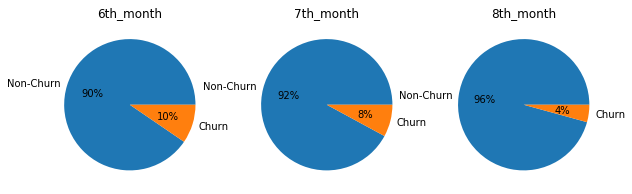

In [43]:
pieplot(a['Total_Recharge6'],b['Total_Recharge7'],c['Total_Recharge8'])

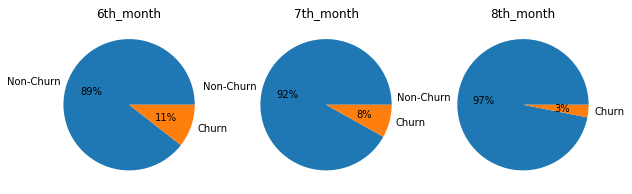

In [44]:
d = churn_v1.groupby('churn_tag')['total_og_mou_6'].sum().to_frame("Total_og6")
e = churn_v1.groupby('churn_tag')['total_og_mou_7'].sum().to_frame("Total_og7")
f = churn_v1.groupby('churn_tag')['total_og_mou_8'].sum().to_frame("Total_og8")
pieplot(d['Total_og6'],e['Total_og7'],f['Total_og8'])

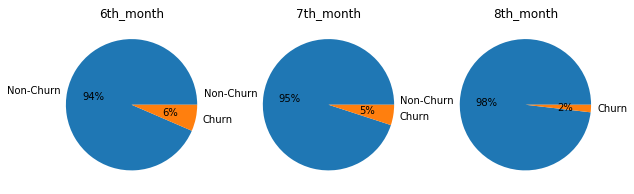

In [45]:
d = churn_v1.groupby('churn_tag')['total_ic_mou_6'].sum().to_frame("Total_ic6")
e = churn_v1.groupby('churn_tag')['total_ic_mou_7'].sum().to_frame("Total_ic7")
f = churn_v1.groupby('churn_tag')['total_ic_mou_8'].sum().to_frame("Total_ic8")
pieplot(d['Total_ic6'],e['Total_ic7'],f['Total_ic8'])

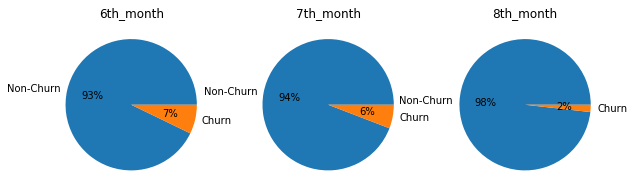

In [46]:
d = churn_v1.groupby('churn_tag')['vol_2g_mb_6'].sum().to_frame("Total_2g6")
e = churn_v1.groupby('churn_tag')['vol_2g_mb_7'].sum().to_frame("Total_2g7")
f = churn_v1.groupby('churn_tag')['vol_2g_mb_8'].sum().to_frame("Total_2g8")
pieplot(d['Total_2g6'],e['Total_2g7'],f['Total_2g8'])

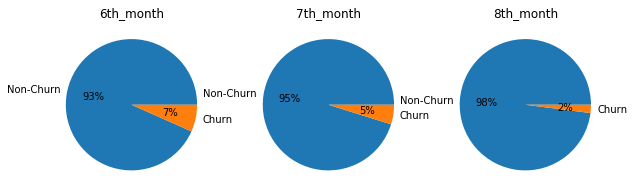

In [47]:
d = churn_v1.groupby('churn_tag')['vol_3g_mb_6'].sum().to_frame("Total_3g6")
e = churn_v1.groupby('churn_tag')['vol_3g_mb_7'].sum().to_frame("Total_3g7")
f = churn_v1.groupby('churn_tag')['vol_3g_mb_8'].sum().to_frame("Total_3g8")
pieplot(d['Total_3g6'],e['Total_3g7'],f['Total_3g8'])

From the above pie charts we can clearly see there is a decreasing tren in each of the variables for churn customers from 6th month to 8th month with significant change in **total recharge and outgoing calls**

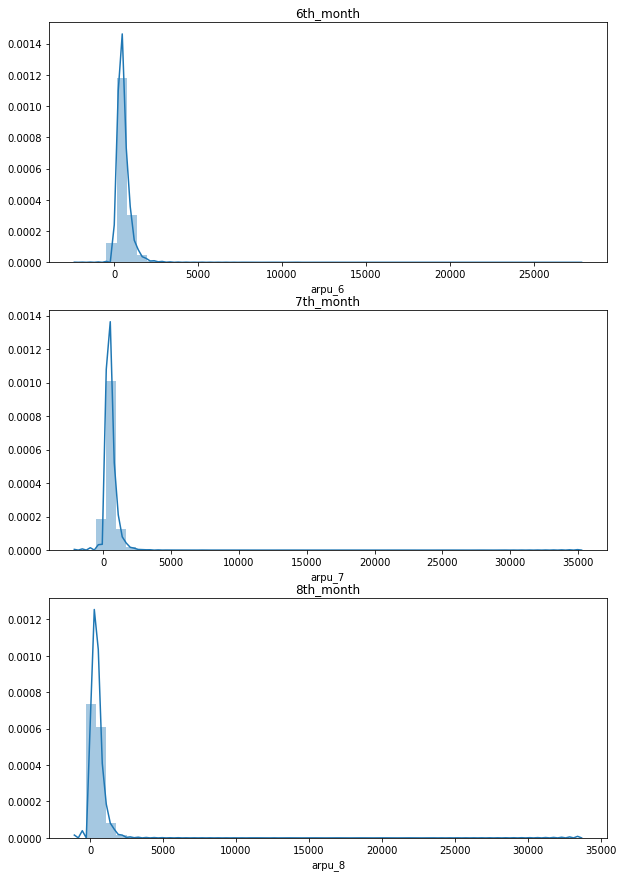

In [48]:
plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
sns.distplot(churn_v1.arpu_6)
plt.title("6th_month")

plt.subplot(3,1,2)
sns.distplot(churn_v1.arpu_7)
plt.title("7th_month")

plt.subplot(3,1,3)
sns.distplot(churn_v1.arpu_8)
plt.title("8th_month")
plt.show()

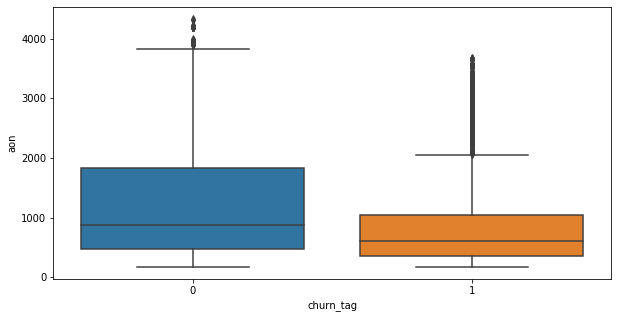

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(churn_v1.churn_tag,churn_v1.aon)
plt.show()

In [50]:
def plotCategoricalVariables(columnName,dataFrame):
    sns.set(style="whitegrid")
    ax = (dataFrame.groupby(columnName).size()/len(dataFrame.index)).plot.bar(color=sns.color_palette('dark', 15))
    ax.set(xlabel= columnName, ylabel='Count')

    plt.show()

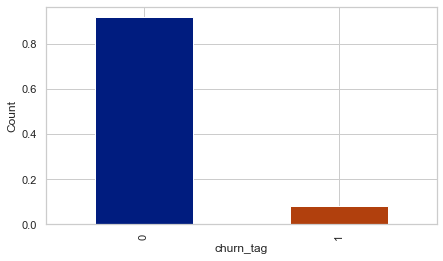

In [51]:
plt.figure(figsize=(7,4))
plotCategoricalVariables("churn_tag", churn_v1)

In [52]:
churn_v1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 166 columns):
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               float64
loc_og_t2t_mou_6            float64
loc_og_t2t_mou_7            float64
loc_og_t2t_mou_8            float64
loc_og_t2m_mou_6            float64
loc_og_t2m_mou_7            float64
loc_og_t2m_mou_8            float64
loc_og_t2f_mou_6            f

The dataset is imbalanced , only 8% churn customers.
We need class balancing.

In [53]:
churn_v1['churn_tag'] = pd.to_numeric(churn_v1['churn_tag'])

In [54]:
#Neeed balancing by synthetic generation of new churn records

Y = churn_v1.pop("churn_tag")
X = churn_v1.select_dtypes(exclude=['object'])

In [55]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn_tag, dtype: int64

In [56]:
# Test Train Split should happen before balancing should be applied only on train data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8,test_size=0.2,random_state=1)

**Balancing the DataSet**

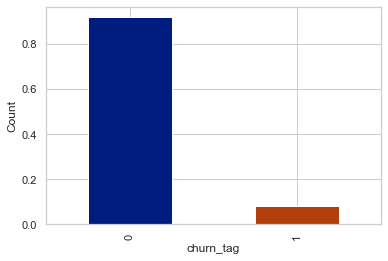

In [57]:
#Before Class Balancing
Y_DF = pd.DataFrame(Y_train)

plotCategoricalVariables("churn_tag", Y_DF)

In [58]:
# ADASYN Balancing , ADASYN is more advanced than SMOTE
from imblearn.over_sampling import ADASYN 

adaSyn = ADASYN()
X_Train_Bal, Y_Train_Bal = adaSyn.fit_sample(X_train, Y_train)
print(X_train.shape)
print(X_Train_Bal.shape)

(24000, 156)
(44215, 156)


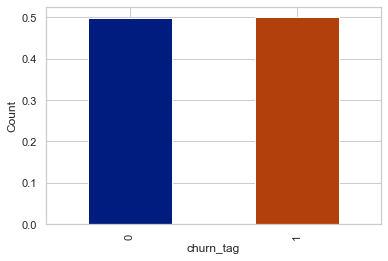

In [59]:
Y_Train_Bal_DF = pd.DataFrame(Y_Train_Bal, columns = {"churn_tag"})
plotCategoricalVariables("churn_tag", Y_Train_Bal_DF)

 AdaSyn Balanced Training Set

Aggregating the categorical columns

In [60]:
train = pd.concat([X_Train_Bal, Y_Train_Bal], axis=1)

# aggregate the categorical variables
train.groupby('night_pck_user_6').churn_tag.mean()
train.groupby('night_pck_user_7').churn_tag.mean()
train.groupby('night_pck_user_8').churn_tag.mean()
train.groupby('fb_user_6').churn_tag.mean()
train.groupby('fb_user_7').churn_tag.mean()
train.groupby('fb_user_8').churn_tag.mean()

fb_user_8
-1.000000    0.607371
-0.999773    1.000000
-0.999620    1.000000
-0.999596    1.000000
-0.996691    1.000000
               ...   
 0.997975    1.000000
 0.998353    1.000000
 0.998949    1.000000
 0.999148    1.000000
 1.000000    0.174817
Name: churn_tag, Length: 4668, dtype: float64

In [61]:
# replace categories with aggregated values in each categorical column
mapping = {'night_pck_user_6' : {-1: 0.099165, 0: 0.066797, 1: 0.087838},
           'night_pck_user_7' : {-1: 0.115746, 0: 0.055494, 1: 0.051282},
           'night_pck_user_8' : {-1: 0.141108, 0: 0.029023, 1: 0.016194},
           'fb_user_6'        : {-1: 0.099165, 0: 0.069460, 1: 0.067124},
           'fb_user_7'        : {-1: 0.115746, 0: 0.059305, 1: 0.055082},
           'fb_user_8'        : {-1: 0.141108, 0: 0.066887, 1: 0.024463}
          }
X_Train_Bal.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


**Standardization Of Data**

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_Train_Bal_Standardized = scaler.fit_transform(X_Train_Bal)
X_Test_Standardized = scaler.transform(X_test)

**Applying PCA**

In [63]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
pca.fit(X_Train_Bal_Standardized)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca.components_

array([[ 1.40955592e-01,  1.62790739e-01,  1.70120724e-01, ...,
         6.98167442e-02,  4.78280731e-02,  4.26120392e-02],
       [-2.79999274e-02,  2.32212495e-03,  7.77515939e-02, ...,
        -3.42429034e-03,  1.90826015e-03, -1.59929213e-03],
       [ 3.70581691e-02,  1.13675713e-01,  1.77648539e-01, ...,
         4.77897845e-02,  3.44130243e-02,  2.43370470e-02],
       ...,
       [ 0.00000000e+00, -1.21718870e-16, -1.19465786e-18, ...,
         3.02815093e-03,  9.70873483e-04,  5.03825232e-04],
       [ 0.00000000e+00,  1.10229654e-16,  2.62723752e-17, ...,
         2.86982345e-01, -9.17721445e-02,  1.64980715e-02],
       [-0.00000000e+00, -5.53760147e-18,  9.02118442e-17, ...,
        -3.45924667e-03, -2.31700857e-04, -1.38647842e-02]])

In [65]:
pca.explained_variance_ratio_

array([9.72685798e-02, 8.23771428e-02, 5.55134200e-02, 4.62510094e-02,
       3.84393095e-02, 3.60586325e-02, 2.92331882e-02, 2.72739514e-02,
       2.60019070e-02, 2.43907205e-02, 2.20061221e-02, 2.07021250e-02,
       1.90674435e-02, 1.84800584e-02, 1.76672818e-02, 1.74058042e-02,
       1.65219659e-02, 1.55147759e-02, 1.47112786e-02, 1.38689576e-02,
       1.34187186e-02, 1.30148021e-02, 1.24598428e-02, 1.22947838e-02,
       1.19491133e-02, 1.16816239e-02, 1.05312811e-02, 9.52420015e-03,
       9.41762344e-03, 9.05760661e-03, 8.75806268e-03, 8.33464375e-03,
       8.10581910e-03, 7.87599042e-03, 7.45300381e-03, 6.87549817e-03,
       6.62146896e-03, 6.51932080e-03, 6.40673241e-03, 6.25724718e-03,
       6.12446075e-03, 5.97222382e-03, 5.83317032e-03, 5.71339711e-03,
       5.58865671e-03, 5.51461255e-03, 5.01201076e-03, 4.51583090e-03,
       4.36675097e-03, 4.13481221e-03, 4.03693177e-03, 3.99826522e-03,
       3.97778315e-03, 3.79547869e-03, 3.73927786e-03, 3.69560086e-03,
      

<BarContainer object of 156 artists>

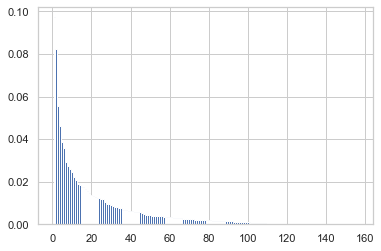

In [66]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [67]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

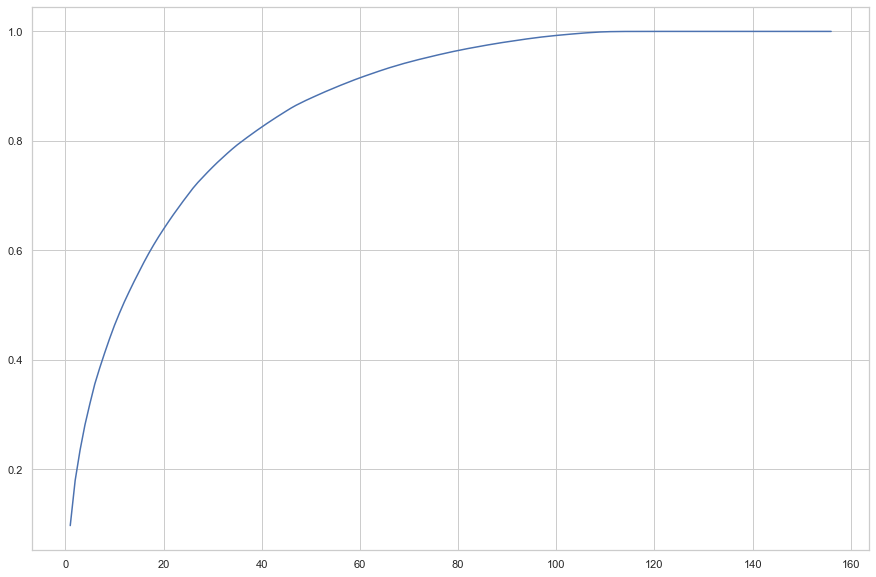

In [68]:

fig = plt.figure(figsize = (15,10))
plt.plot(range(1,len(var_cumu)+1), var_cumu)



40 Features explain ~ 85 % variance and 60 features ~ 90 % , with 100 features variance explained is almost 100 %

In [69]:
# for  better model , we will take 60 features 

In [72]:
pca60Components = PCA(n_components = 60, random_state=100)
X_Train_Bal_Standardized_PCA60 = pca60Components.fit_transform(X_Train_Bal_Standardized)
X_Test_Standardized_PCA60 = pca60Components.transform(X_Test_Standardized)
print(X_Train_Bal_Standardized_PCA60.shape)
print(X_Test_Standardized_PCA60.shape)

(44215, 60)
(6001, 60)


## Model Building

Now the Data is Balanced, Standardized and of Reduced Dimensionality

We need to apply 

3 Models for good Prediction

1 Model for Interpretability

## 1. **Decision Tree**

In [73]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [74]:
searchParamGrid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 500, 50),
    'min_samples_split': range(100, 500, 100),
}



In [75]:
dtc=DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator = dtc, param_grid = searchParamGrid, 
                          cv = 5, verbose=2, n_jobs = 4)

In [76]:
grid_search.fit(X_Train_Bal_Standardized_PCA60,Y_Train_Bal )

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   49.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_depth': range(5, 15, 3),
                         'm

In [77]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8254664706547551
{'max_depth': 14, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [78]:
dtc_best = DecisionTreeClassifier(max_depth=11,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             random_state=100)

In [79]:
dtc_best.fit(X_Train_Bal_Standardized_PCA60,Y_Train_Bal )

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [80]:
Y_TestPreds = dtc_best.predict(X_Test_Standardized_PCA60)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_TestPreds))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      5499
           1       0.26      0.68      0.37       502

    accuracy                           0.81      6001
   macro avg       0.61      0.75      0.63      6001
weighted avg       0.91      0.81      0.84      6001



Recall is important as we want to identify all churn cases.
**Using Grid Search with Decision Tree we get Test Recall of 0.7 **

In [82]:
from imblearn.metrics import sensitivity_specificity_support
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test,Y_TestPreds, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.68
Specificity: 	0.82


In [85]:
from sklearn.metrics import roc_auc_score
Y_pred_prob = grid_search.predict_proba(X_Test_Standardized_PCA60)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_TestPreds, Y_pred_prob),2))

AUC:    	 0.99


## 2. **Gradient Boost**

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [87]:
GBC = GradientBoostingClassifier(random_state=100)
    

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [89]:
GBC.fit(X_Train_Bal_Standardized_PCA60,Y_Train_Bal)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [90]:
Y_TestPreds = GBC.predict(X_Test_Standardized_PCA60)

In [91]:
print(classification_report(Y_test,Y_TestPreds))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5499
           1       0.35      0.75      0.47       502

    accuracy                           0.86      6001
   macro avg       0.66      0.81      0.70      6001
weighted avg       0.92      0.86      0.88      6001



In [92]:
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test,Y_TestPreds, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.75
Specificity: 	0.87


In [93]:
Y_pred_prob = grid_search.predict_proba(X_Test_Standardized_PCA60)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_TestPreds, Y_pred_prob),2))

AUC:    	 0.91


**Without Any Tuning Gradient Boost Got Recall of .75 on Churn Detection**

In [94]:
# parameter grid
param_grid = {"learning_rate": [0.07],
              "subsample": [0.8],
              "n_estimators" : [150, 200],
              "max_depth" : [5,10]
             }

In [95]:
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 2,
                               n_jobs =5)

grid_search_GBC.fit(X_Train_Bal_Standardized_PCA60,Y_Train_Bal)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  10 out of  12 | elapsed:  9.1min remaining:  1.8min
[Parallel(n_jobs=5)]: Done  12 out of  12 | elapsed: 11.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [96]:
print(grid_search_GBC.best_score_)
print(grid_search_GBC.best_params_)

0.9788949995345835
{'learning_rate': 0.07, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


In [97]:
GBC_best = GradientBoostingClassifier(learning_rate=0.07,
                             max_depth=10, 
                             n_estimators=200,
                             subsample =0.8,
                             random_state=100)

In [98]:
GBC_best.fit(X_Train_Bal_Standardized_PCA60,Y_Train_Bal)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.07, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
Y_TestPreds = GBC_best.predict(X_Test_Standardized_PCA60)
print(classification_report(Y_test,Y_TestPreds))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5499
           1       0.48      0.60      0.53       502

    accuracy                           0.91      6001
   macro avg       0.72      0.77      0.74      6001
weighted avg       0.92      0.91      0.92      6001



## 3. XGBoost

In [100]:
model = XGBClassifier()
model.fit(X_Train_Bal_Standardized_PCA60,Y_Train_Bal)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [101]:
Y_TestPreds = model.predict(X_Test_Standardized_PCA60)
print(classification_report(Y_test,Y_TestPreds))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5499
           1       0.34      0.74      0.46       502

    accuracy                           0.86      6001
   macro avg       0.65      0.80      0.69      6001
weighted avg       0.92      0.86      0.88      6001



In [102]:
sensitivity, specificity, _ = sensitivity_specificity_support(Y_test,Y_TestPreds, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

Sensitivity: 	0.74
Specificity: 	0.87


In [103]:
Y_pred_prob = grid_search.predict_proba(X_Test_Standardized_PCA60)[:, 1]
print("AUC:    \t", round(roc_auc_score(Y_TestPreds, Y_pred_prob),2))

AUC:    	 0.91


#### XG Boost also gives recall of 0.74 for Churn Prediction

The best model is PCA along with XG Boost.

## **Interpretability**

We use the Logistic Regression here w/o PCA to determine insights.



In [172]:
import statsmodels.api as sm

In [173]:
logm1 = sm.GLM(Y_Train_Bal,(sm.add_constant(X_Train_Bal_Standardized)), family = sm.families.Binomial())
logm1.fit().summary()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/opt/anaconda3/lib/python3.7/site-packages/

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              churn_tag   No. Observations:                44215
Model:                            GLM   Df Residuals:                    44072
Model Family:                Binomial   Df Model:                          142
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 May 2020   Deviance:                          nan
Time:                        21:47:10   Pearson chi2:                 3.33e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.525e+14   3.19e+05   2.67e+09      0.000    8.52e+14    8.52e+14
x1          5.319e+13   1.13e+06   4.71e+07      0.000    5.32e+13    5.32e+13
x2           1.37e+14    1.3e+06   1.05e+08      0.000    1.37e+14    1.37e+14
x3          1.447e+14   9.25e+05   1.56e+08      0.000    1.45e+14    1.45e+14
x4         -5.115e+14   2.21e+07  -2.32e+07      0.000   -5.11e+14   -5.11e+14
x5         -2.439e+13   2.01e+07  -1.22e+06      0.000   -2.44e+13   -2.44e+13
x6         -9.505e+11   1.94e+07  -4.91e+04      0.000   -9.51e+11   -9.51e+11
x7         -6.385e+14   2.18e+07  -2.93e+07      0.000   -6.39e+14   -6.39e+14
x8          4.088e+14   1.91e+07   2.13e+07      0.000    4.09e+14    4.09e+14
x9          -1.01e+14   1.96e+07  -5.14e+06      0.000   -1.01e+14   -1.01e+14
x10        -3.477e+13   5.44e+05  -6.39e+07      0.000   -3.48e+13   -3.48e+13
x11         1.039e+13   6.05e+05   1.72e+07      0.000    1.04e+13    1.04e+13
x12         4.957e+12      5e+05   9.92e+06      0.000    4.96e+12    4.96e+12
x13         1.463e+14   5.53e+06   2.65e+07      0.000    1.46e+14    1.46e+14
x14         -6.44e+13   4.55e+06  -1.42e+07      0.000   -6.44e+13   -6.44e+13
x15         3.634e+13   6.01e+06   6.05e+06      0.000    3.63e+13    3.63e+13
x16         6.752e+17   1.28e+10   5.27e+07      0.000    6.75e+17    6.75e+17
x17         1.617e+17   1.29e+10   1.25e+07      0.000    1.62e+17    1.62e+17
x18          7.54e+17   1.18e+10    6.4e+07      0.000    7.54e+17    7.54e+17
x19         7.819e+17   1.48e+10   5.27e+07      0.000    7.82e+17    7.82e+17
x20         1.706e+17   1.37e+10   1.25e+07      0.000    1.71e+17    1.71e+17
x21           8.3e+17    1.3e+10    6.4e+07      0.000     8.3e+17     8.3e+17
x22          7.92e+16    1.5e+09   5.28e+07      0.000    7.92e+16    7.92e+16
x23         1.706e+16   1.37e+09   1.24e+07      0.000    1.71e+16    1.71e+16
x24         6.582e+16   1.03e+09    6.4e+07      0.000    6.58e+16    6.58e+16
x25         -5.11e+13   4.49e+05  -1.14e+08      0.000   -5.11e+13   -5.11e+13
x26         2.687e+13   5.49e+05    4.9e+07      0.000    2.69e+13    2.69e+13
x27        -1.162e+13   4.24e+05  -2.74e+07      0.000   -1.16e+13   -1.16e+13
x28        -2.147e+18   2.76e+10  -7.78e+07      0.000   -2.15e+18   -2.15e+18
x29         4.978e+17   2.76e+10    1.8e+07      0.000    4.98e+17    4.98e+17
x30        -3.145e+17   2.66e+10  -1.18e+07      0.000   -3.15e+17   -3.15e+17
x31         1.058e+18   3.79e+10   2.79e+07      0.000    1.06e+18    1.06e+18
x32         7.105e+17   3.79e+10   1.87e+07      0.000     7.1e+17     7.1e+17
x33         2.392e+17   3.28e+10   7.29e+06      0.000    2.39e+17    2.39e+17
x34         1.038e+18   3.72e+10   2.79e+07      0.000    1.04e+18    1.04e+18
x35         7.128e+17   3.81e+10   1.87e+07      0.000    7.13e+17    7.13e+17
x3

In [174]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)

In [175]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 60)             
rfe = rfe.fit(X_Train_Bal_Standardized, Y_Train_Bal)

In [108]:
rfe.support_

array([False,  True,  True, False,  True,  True, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True,

In [109]:
Importance = list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [110]:
col = X_train.columns[rfe.support_]

In [111]:
Y_Pred = rfe.predict(X_Test_Standardized)

In [112]:
print(classification_report(Y_test,Y_TestPreds))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92      5499
           1       0.34      0.74      0.46       502

    accuracy                           0.86      6001
   macro avg       0.65      0.80      0.69      6001
weighted avg       0.92      0.86      0.88      6001



In [113]:
print(Importance)

[('arpu_6', False, 8), ('arpu_7', True, 1), ('arpu_8', True, 1), ('onnet_mou_6', False, 20), ('onnet_mou_7', True, 1), ('onnet_mou_8', True, 1), ('offnet_mou_6', False, 35), ('offnet_mou_7', True, 1), ('offnet_mou_8', True, 1), ('roam_ic_mou_6', False, 30), ('roam_ic_mou_7', False, 53), ('roam_ic_mou_8', False, 57), ('roam_og_mou_6', False, 34), ('roam_og_mou_7', True, 1), ('roam_og_mou_8', True, 1), ('loc_og_t2t_mou_6', False, 61), ('loc_og_t2t_mou_7', False, 21), ('loc_og_t2t_mou_8', False, 7), ('loc_og_t2m_mou_6', False, 9), ('loc_og_t2m_mou_7', True, 1), ('loc_og_t2m_mou_8', False, 65), ('loc_og_t2f_mou_6', True, 1), ('loc_og_t2f_mou_7', True, 1), ('loc_og_t2f_mou_8', False, 67), ('loc_og_t2c_mou_6', False, 27), ('loc_og_t2c_mou_7', False, 26), ('loc_og_t2c_mou_8', False, 71), ('loc_og_mou_6', False, 31), ('loc_og_mou_7', True, 1), ('loc_og_mou_8', True, 1), ('std_og_t2t_mou_6', False, 45), ('std_og_t2t_mou_7', False, 3), ('std_og_t2t_mou_8', False, 29), ('std_og_t2m_mou_6', False,

In [114]:
def sortingVal(row):
  return row[2]

Importance.sort( key=sortingVal)

print (Importance)

[('arpu_7', True, 1), ('arpu_8', True, 1), ('onnet_mou_7', True, 1), ('onnet_mou_8', True, 1), ('offnet_mou_7', True, 1), ('offnet_mou_8', True, 1), ('roam_og_mou_7', True, 1), ('roam_og_mou_8', True, 1), ('loc_og_t2m_mou_7', True, 1), ('loc_og_t2f_mou_6', True, 1), ('loc_og_t2f_mou_7', True, 1), ('loc_og_mou_7', True, 1), ('loc_og_mou_8', True, 1), ('std_og_t2m_mou_7', True, 1), ('std_og_mou_7', True, 1), ('isd_og_mou_7', True, 1), ('isd_og_mou_8', True, 1), ('total_og_mou_8', True, 1), ('loc_ic_t2t_mou_8', True, 1), ('loc_ic_t2m_mou_8', True, 1), ('loc_ic_t2f_mou_8', True, 1), ('loc_ic_mou_8', True, 1), ('std_ic_t2t_mou_8', True, 1), ('std_ic_t2m_mou_7', True, 1), ('total_ic_mou_7', True, 1), ('total_ic_mou_8', True, 1), ('spl_ic_mou_8', True, 1), ('total_rech_num_6', True, 1), ('total_rech_num_7', True, 1), ('total_rech_num_8', True, 1), ('total_rech_amt_7', True, 1), ('max_rech_amt_7', True, 1), ('last_day_rch_amt_8', True, 1), ('total_rech_data_6', True, 1), ('total_rech_data_7', 

In [177]:
# Top 30 Predictors for Churn
for item in Importance[:20]:
    print(item[0])

arpu_7
arpu_8
onnet_mou_7
onnet_mou_8
offnet_mou_7
offnet_mou_8
roam_og_mou_7
roam_og_mou_8
loc_og_t2m_mou_7
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_mou_7
loc_og_mou_8
std_og_t2m_mou_7
std_og_mou_7
isd_og_mou_7
isd_og_mou_8
total_og_mou_8
loc_ic_t2t_mou_8
loc_ic_t2m_mou_8


## Business Recomendations

1. As roaming is an important predictor, company has to focus on decreasing the roaming charges or introduce some incentives in this field
2. Also they can introduce packages for ISD and STD which might benfit the customer a little more and decrease the churn
3. Also outgoing calls play an important role in predicting the churn cases, for specific set of customers whoes outgoing volume is decreased, the companies can give special perks and packages to retain them.